In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import os 
%matplotlib inline

# PALLADIUM

In [22]:
#Put path to the folder with data source
os.chdir('F:/GitHub/Analysis-and-forecast-of-stock-exchange-price-based-on-selected-indicators-using-machine-learning/data/azagorowski_data')

#Put source file name
source = 'palladium-prices-historical-chart-data.csv'

In [23]:
#Display options
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 1000)

In [32]:
#Import data, skip description rows, use columns: date & value
df = pd.read_csv(source, skiprows=14,
                     usecols=['date',' value'])

#Convert column type to date time
df["date"] = pd.to_datetime(df["date"])

#Select price between 2010-01-01 and 2020-03-24
filter = (df['date'] >= '2010-01-01') & (df['date'] < '2020-03-24')
df = df[filter]

#Rename columns
df = df.rename(columns={'date': 'Date', ' value': 'Price'})

#Reset the index order
df.index = df['Date']
df = df.drop(columns=['Date'])

#Display Data Frame
df.head()

Price
Date              
2010-01-04  421.40
2010-01-05  421.95
2010-01-06  427.20
2010-01-07  424.55
2010-01-08  425.15

## Palladium price chart

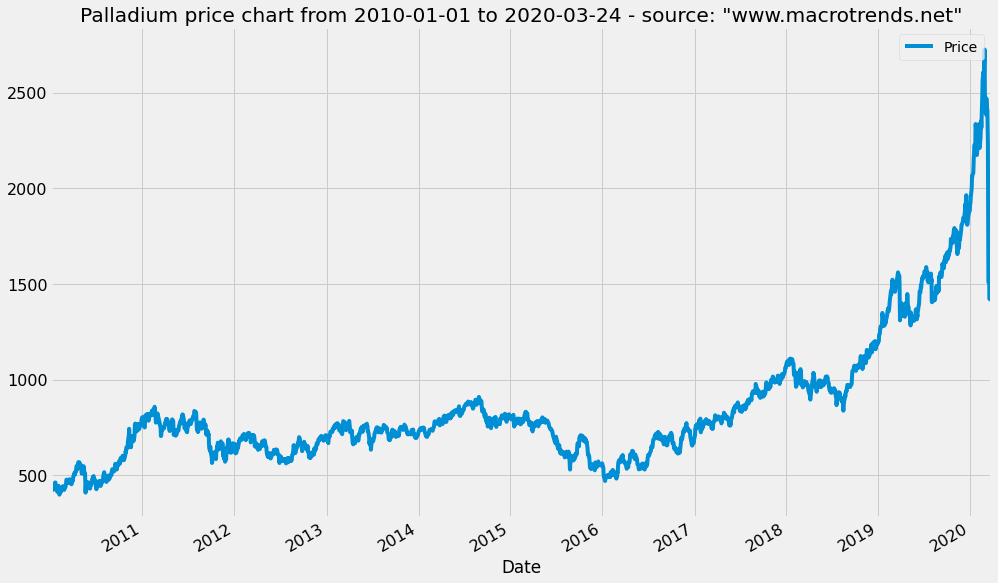

In [33]:
plt.style.use('fivethirtyeight')
df.plot(title="Palladium price chart from 2010-01-01 to 2020-03-24 - source: \"www.macrotrends.net\"",
            figsize=(15,10),grid=True,fontsize=16)

In [34]:
#Reset index and creating of new date column
df = df.reset_index()

#Rename columns for prophet library
df = df.rename(columns={'Date': 'ds', 'Price': 'y'})

#Display Data Frame
df.head()

ds       y
0 2010-01-04  421.40
1 2010-01-05  421.95
2 2010-01-06  427.20
3 2010-01-07  424.55
4 2010-01-08  425.15

In [35]:
#Import Prophet library
from fbprophet import Prophet

#Instantiating a new Prophet object
m = Prophet(daily_seasonality=True)

#Call object's fit method and pass in the historical dataframe
m.fit(df)

In [38]:
#Extend the "ds" column with forecast
future = m.make_future_dataframe(freq='D',periods=365)
future.tail()

ds
2934 2021-03-19
2935 2021-03-20
2936 2021-03-21
2937 2021-03-22
2938 2021-03-23

In [39]:
#Assign predicted values
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
2934 2021-03-19  2554.584317  2343.402979  2777.659845
2935 2021-03-20  2563.235571  2350.529196  2789.040616
2936 2021-03-21  2562.600799  2333.902331  2790.276899
2937 2021-03-22  2551.883895  2319.501039  2777.051505
2938 2021-03-23  2554.346054  2342.889692  2785.021263

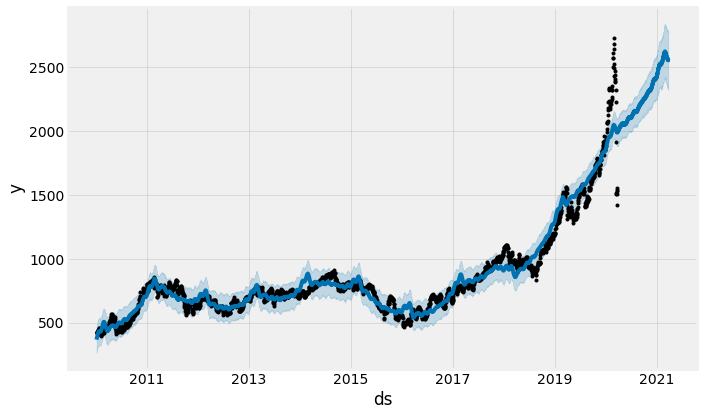

In [40]:
#Show a plot with the forecast
fig1 = m.plot(forecast)

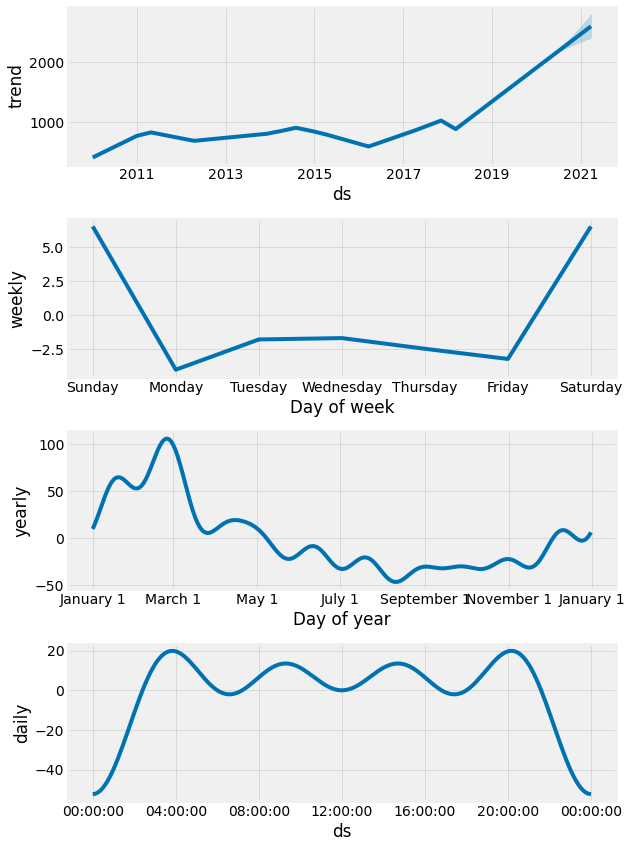

In [41]:
#Show a plot with components
fig2 = m.plot_components(forecast)

In [42]:
#Show interactive plot using plotly
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

#Add trendline to plot
fig = plot_plotly(m, forecast,trend=True)

#Update plot title, labels and other display options
fig.update_layout(
    title="Palladium price forecast 2021 using Prophet - source: \"www.macrotrends.net\"",
    xaxis_title="Date",
    yaxis_title="Price",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#242151"
    )
)
py.iplot(fig)